<h1 align='center'>
<span style='color:orange'>
<b>
USING LINEAR REGRESSION MODEL PREDICT FINAL HOUSE LOAN
</b>
</p>
</h1>

## **| Process**

1. Read and Load data
2. Data Analysis
3. Data Preprocessing
4. Feature Enginering
5. Build and Training Linear Regression model 
6. Show the model's intercepts, coeficients by using Ridge, Lasso and ElasticNet and compare the error of 3 algorithms
6. Let's try Polynomial of order 2 to compare the previous results. What will the result be if we choose the n order too high?

<br>

<h2 align='center'>
<span style='background:black; color: orange'>
<b>
1 | Read and Load data
</b>
</span>
</h2>

This is a dataset related to how much money a person can get from a mortgage on his or her home, includes the following features:

- **Gender**: Gender of the borrower (including two values 'F' and 'M').
- **Age**: Age of the customer applying for a loan (including positive integer values).
- **Income (USD)**: Customer's income in USD (value is a positive number).
- **Income Stability**: The level of customer's income stability (including three values of Low and High).
- **Property Age**: Life expectancy of the house in days (including positive integer values).
- **Property Location**: Location of the house (including 'Rural', 'Urban', and 'Semi-Urban').
- **Property Price**: The value of the house in USD (including positive real values).
- **Loan Sanction Amount** (USD): Amount that customers can borrow in USD (target value).

In [127]:
import numpy as np
import pandas as pd

import os
import sys
sys.path.append(os.path.abspath('../'))
import utils

In [128]:
df = utils.read_dataset('final_house_loan.csv')

The first three rows of this data frame:


,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002


Description of this dataframe:


,count,mean,std,min,25%,50%,75%,max
Age,47297.0,40.000063,16.086128,18.000000,24.000000,40.000000,55.000000,6.500000e+01
Income (USD),47265.0,2586.684384,1558.768809,372.700000,1653.740000,2245.480000,3128.560000,5.466275e+04
Property Age,47263.0,2586.611058,1558.842286,370.700000,1652.820000,2244.810000,3128.380000,5.464775e+04
Property Price,47297.0,135088.045810,94578.752770,7859.620000,62504.080000,113093.600000,181954.630000,1.077967e+06
Loan Sanction Amount (USD),47297.0,46487.229765,32549.905634,254.586578,21782.822159,38822.132402,62612.236905,3.661312e+05


<br>

Establish essential modules and define unified style for plotting:

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

font = {
  'fontsize': 16,
  'fontstyle': 'normal',
  'backgroundcolor': 'black',
  'color': 'white'
}
color = 'YlOrBr'

%matplotlib inline
plt.style.use('_mpl-gallery')
plt.style.use('seaborn-v0_8')

<br>

<h2 align='center'>
<span style='background:black; color: orange'>
<b>
2 | Data Analysis
</b>
</span>
</h2>

In [130]:
# Check null values
df.isnull().sum()

Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [131]:
# Check duplicated values
df.duplicated().sum()

np.int64(0)

<br>
<h3 align='center'>
<span style='background:lightyellow; color:orange'>
<b>
2.1 | Classify data
</b>
</span>
</h3>

Now we classify the data based on its data types: category and numeber, making it easier to visualize them and understand more about our data.

In [132]:
[print(f'{col} - total unique values: {df[col].nunique()}') for col in df.columns]
print('\nSố lượng unique values bằng 2 là Categorical columns, lớn hơn 2 là Numerical columns.')

Gender - total unique values: 2
Age - total unique values: 48
Income (USD) - total unique values: 40936
Income Stability - total unique values: 2
Property Age - total unique values: 40923
Property Location - total unique values: 3
Property Price - total unique values: 15450
Loan Sanction Amount (USD) - total unique values: 45437

Số lượng unique values bằng 2 là Categorical columns, lớn hơn 2 là Numerical columns.


In [133]:
target = 'Loan Sanction Amount (USD)'
cat_df = df.select_dtypes(exclude='number')
num_df = df.select_dtypes(include='number')

<br>
<h3 align='center'>
<span style='background:lightyellow; color:orange'>
<b>
2.2 | Visualize Categorical data
</b>
</span>
</h3>

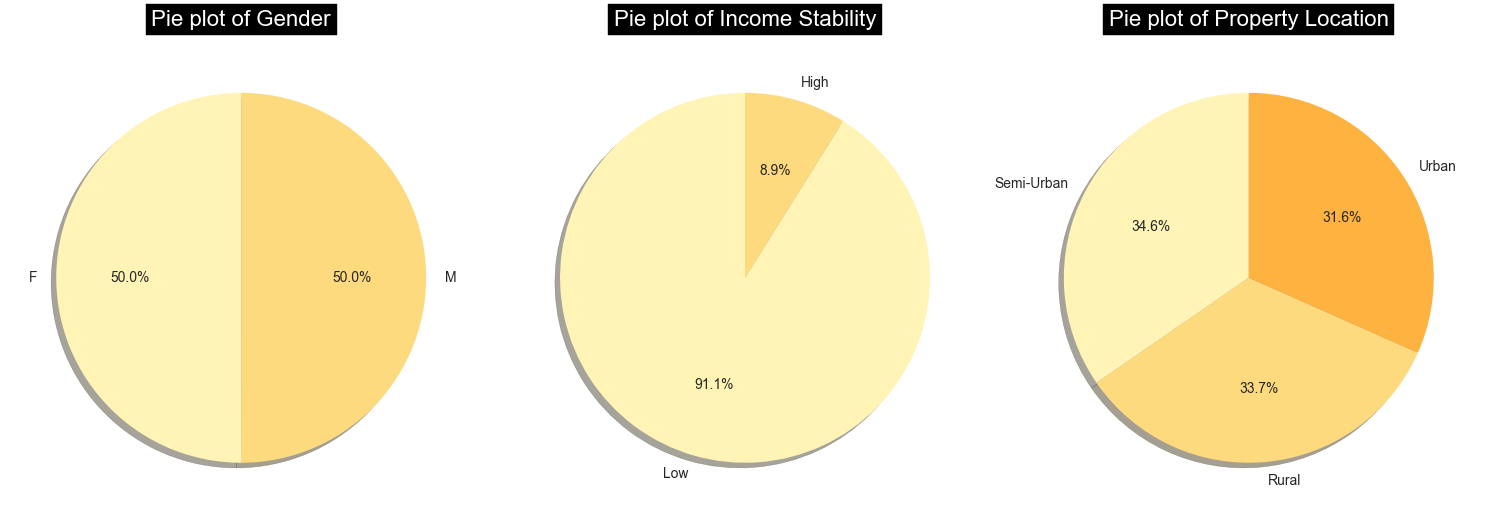

In [134]:
utils.custom_pieplot(df=cat_df, ncols=3, figsize=(15, 7), color=color)

> Insight: Overall, the variables *‘Gender’* and *‘Property Location’* show a relatively even distribution across their respective categories. In contrast, *‘Income Stability’* is notably skewed, with a majority of individuals falling into the *‘Low income’* category.

<br>
<h3 align='center'>
<span style='background:lightyellow; color:orange'>
<b>
2.3 | Visualize Numerical data
</b>
</span>
</h3>

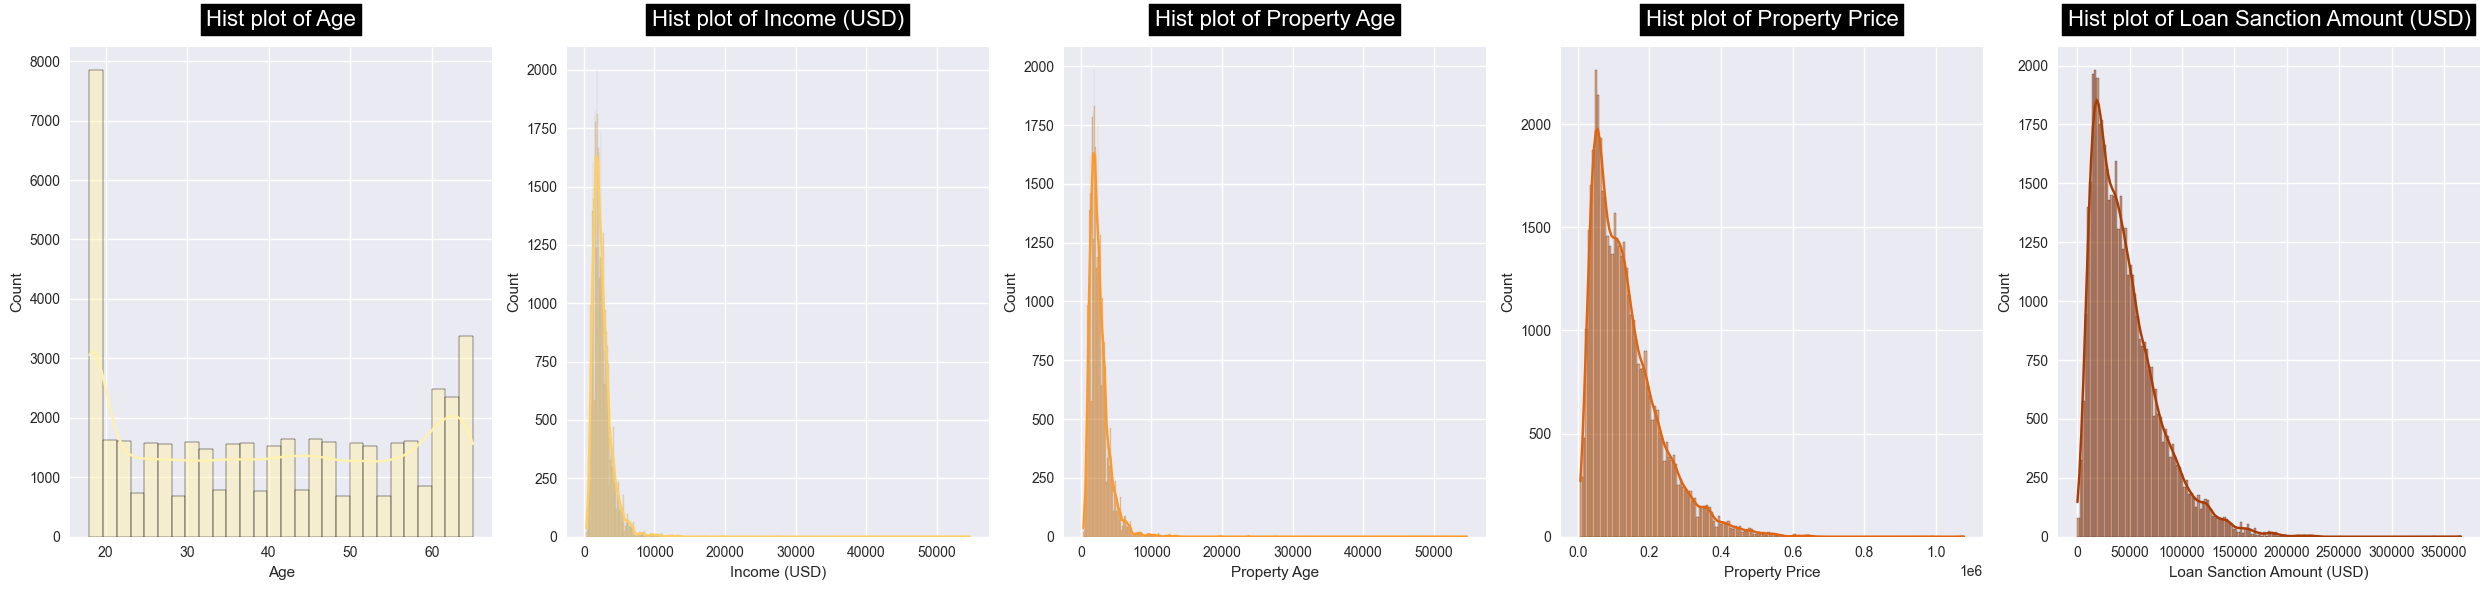

In [135]:
utils.custom_histplot(df=num_df, ncols=5, figsize=(25, 6), color=color)

> Insights: Overall, our data is skewed right and this is a positive distribution.

<br>

Now let's draw box plot to detect outliers in numerical data.

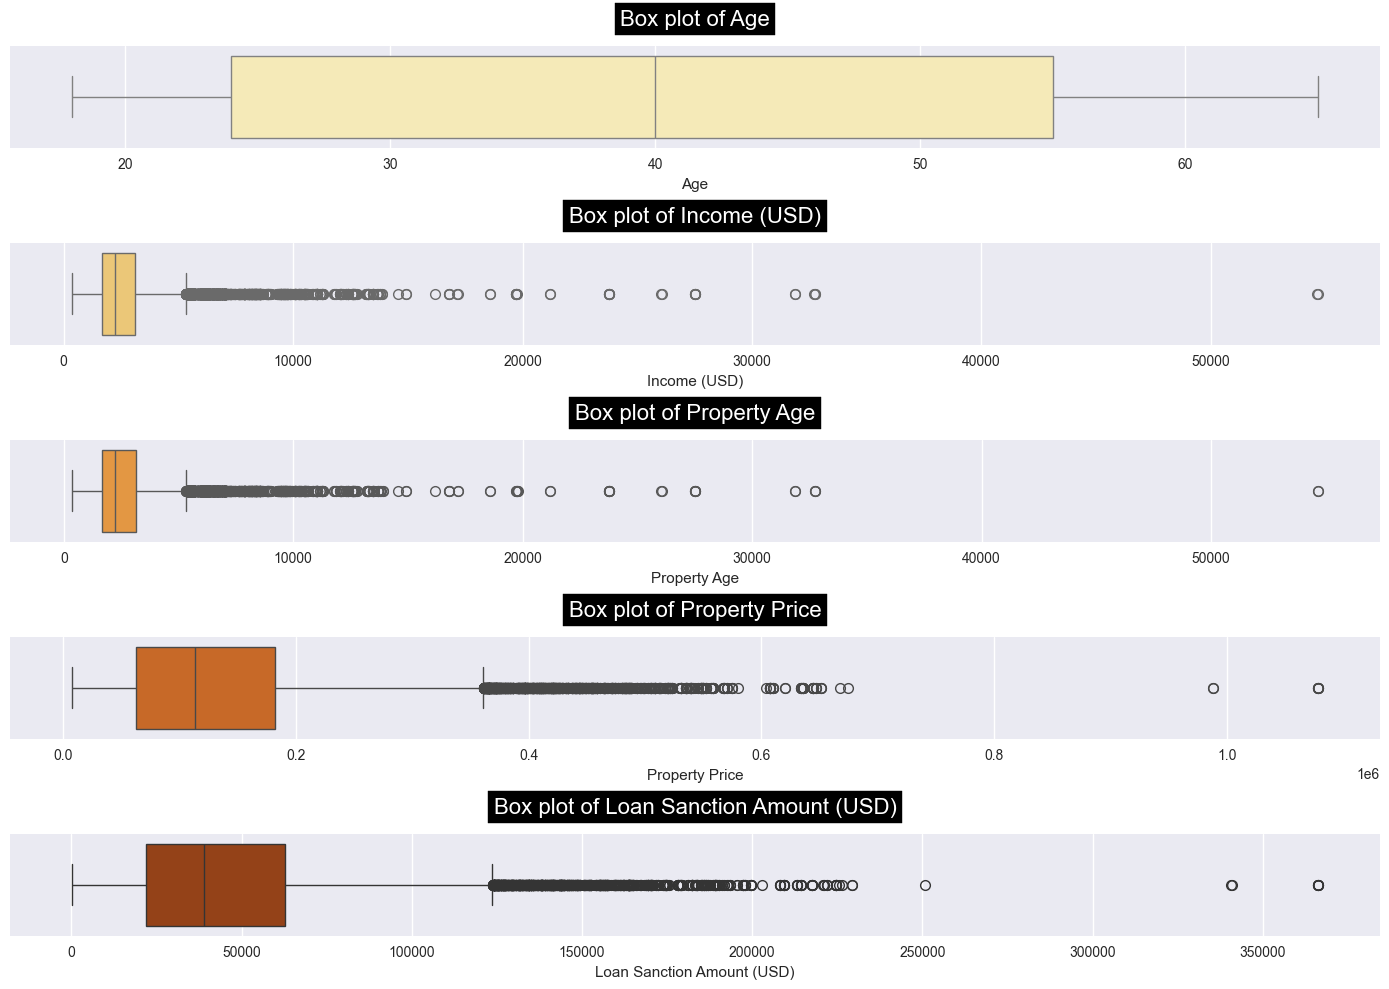

In [136]:
utils.custom_boxplot(df=num_df, ncols=1, color=color)

> Insight: Except for the *'Age'* column, all other numeric columns have too many outlier values. Therefore we need to process and consider to remove them.

<br>

<h2 align='center'>
<span style='background:black; color:orange'>
<b>
3| Preprocess Data
</b>
</span>
</h2>

<br>
<h3 align='center'>
<span style='background:lightyellow; color:orange'>
<b>
3.1 | Clean Data
</b>
</span>
</h3>

In [137]:
def clean_data(df):
    '''
        (Optional) Drop null datapoints or fill missing data
        Keep your data the same if you dont want to customize it
    '''
    print(f'The shape before preprocessing data: {df.shape}')
    df = df.dropna()
    print(f'The shape after preprocessing data: {df.shape}')
    return df

clean_df = clean_data(df.copy())

The shape before preprocessing data: (47297, 8)
The shape after preprocessing data: (47251, 8)


<br>
<h3 align='center'>
<span style='background:lightyellow; color:orange'>
<b>
3.2 | Detect Outlier
</b>
</span>
</h3>

In [138]:
preprocessed_df = utils.remove_outliers_byusing_quantile(df=clean_df)

Dataset shape Before remove outlier: (47251, 8)
Age: 0
Income (USD): 2076
Property Age: 2075
Property Price: 1454
Loan Sanction Amount (USD): 1488
Dataset shape After remove outlier: (43951, 8)


<br>
<h2 align='center'>
<span style='background:black; color:orange'>
<b>
4| Feature Enginering
</b>
</span>
</h2>

In [139]:
from sklearn.preprocessing import MinMaxScaler


def normalize(df: pd.DataFrame) -> pd.DataFrame:
    '''
        Normalize a dataframe
    '''
    cat_df = df.select_dtypes(exclude='number')
    num_df = df.select_dtypes(include='number')

    # Normalize Categorical data
    cat_df = pd.get_dummies(
        cat_df, columns=cat_df.columns, drop_first=True, dtype=int
    )

    # Normalize Numerical data
    num_df[num_df.columns] = MinMaxScaler().fit_transform(df[num_df.columns])

    return pd.concat([cat_df, num_df], axis=1)

In [140]:
normalized_df = normalize(preprocessed_df.copy())
display(normalized_df.head(3))

,Gender_M,Income Stability_Low,Property Location_Semi-Urban,Property Location_Urban,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
0,0,1,0,0,0.021277,0.255428,0.257981,0.146668,0.168764
1,1,1,0,1,0.234043,0.325592,0.326369,0.487168,0.490247
2,0,1,0,0,0.404255,0.297443,0.299413,0.309971,0.316269


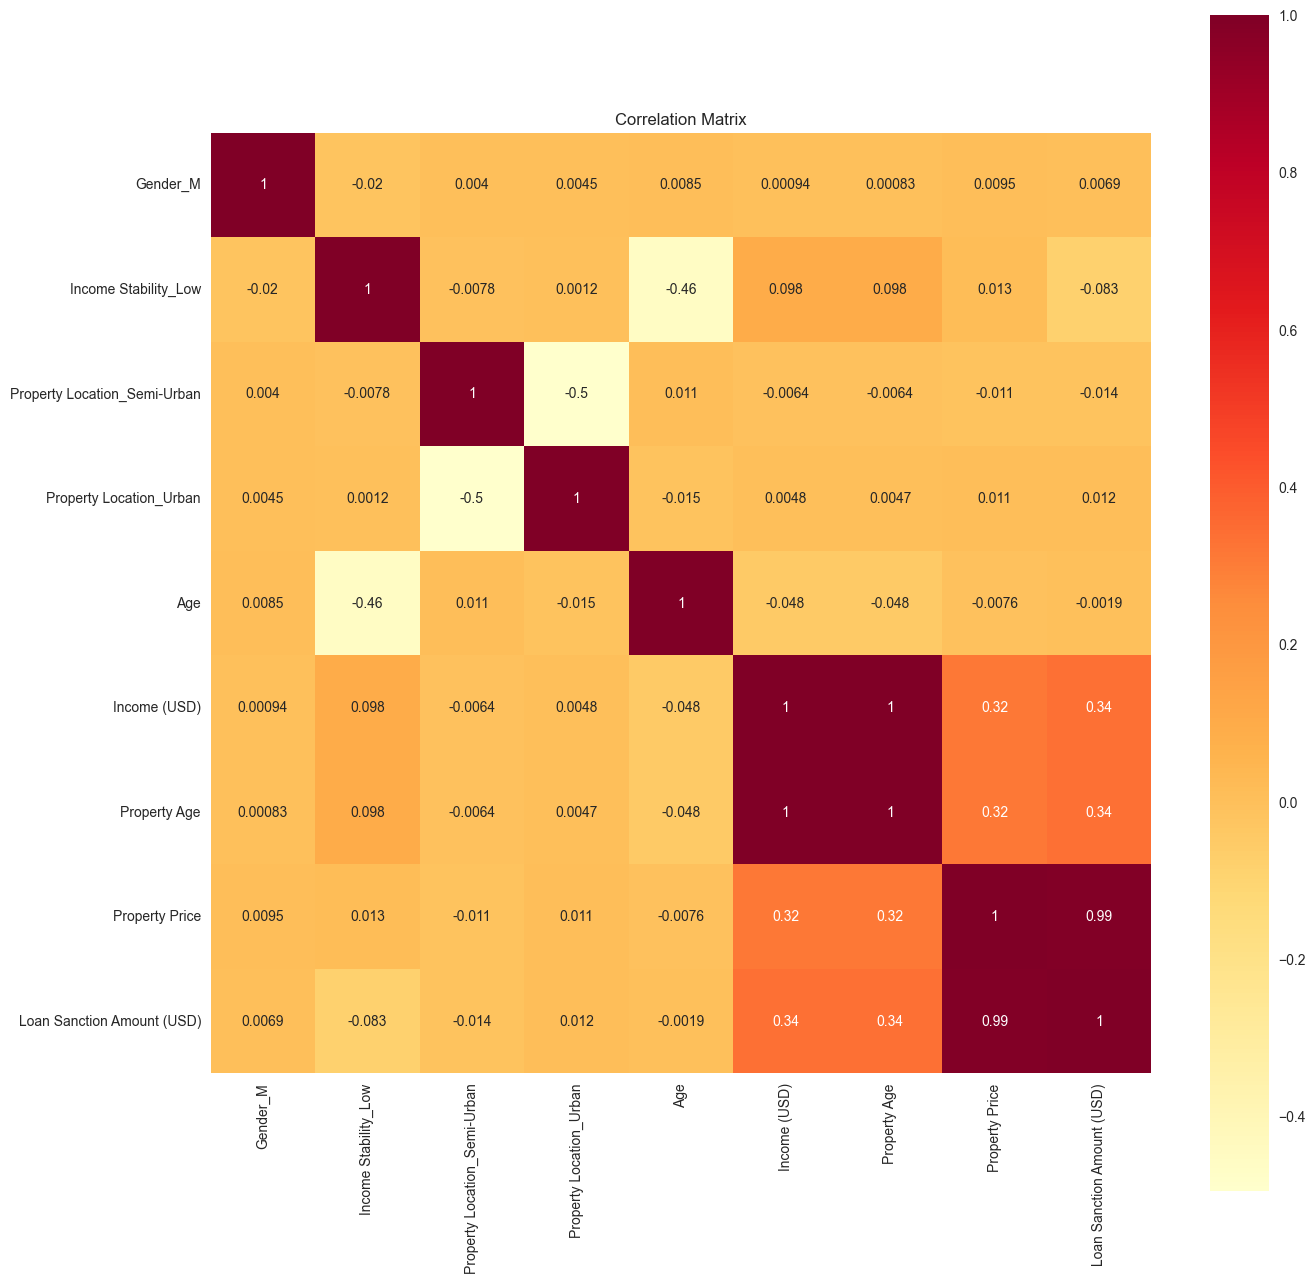

In [141]:
utils.custom_heatmap(df=normalized_df, figsize=(12, 12), color='YlOrRd')

<br>

Prepare data for train-test split step:

In [142]:
X, y = utils.prepare_x_y(df=normalized_df, target=target)
print(f'X shape: {X.shape}\nY shape: {y.shape}')

X shape: (43951, 8)
Y shape: (43951, 1)


<br>

<h2 align='center'>
<span style='background:black; color:orange'>
<b>
5| Build and Train model
</b>
</span>
</h2>

<br>
<h3 align='center'>
<span style='background:lightyellow; color:orange'>
<b>
5.1 | Split data
</b>
</span>
</h3>

In [143]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 24
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(
    X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE, shuffle=True
)
print(f'Train X shape: {trainX.shape}')
print(f'Train y shape: {trainY.shape}')
print(f'Test X shape: {testX.shape}')
print(f'Test y shape: {testY.shape}')

Train X shape: (30765, 8)
Train y shape: (30765, 1)
Test X shape: (13186, 8)
Test y shape: (13186, 1)


<br>
<h3 align='center'>
<span style='background:lightyellow; color:orange'>
<b>
5.2 | Build Linear Regression Model
</b>
</span>
</h3>

First, since the data has been outliers treated and is currently relatively 'clean' and stable, we will evaluate the model using **$R^2$** to assess how well the overall model explains the data.

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.base import ClassifierMixin
from sklearn.metrics import r2_score


def build_linear_model(X: np.array, y: np.array):
    '''
        Design model and train it (including your best params)
            :param X: feature matrix
            :param y: target
            :return: a model
    '''
    model = LinearRegression(fit_intercept=True)
    model.fit(X, y)
    return model


def model_display(
    model: ClassifierMixin, X_test: np.array = testX, y_test: np.array = testY
) -> np.array:
    '''
        :param model: model to evaluate
        :param X_test: test features
        :param y_test: test labels
    '''
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'R2 score: {r2}')

    print(f'Model Coefficent:\n{model.coef_[0]}')
    print(f'Model Intercept: {model.intercept_[0]}')
    return y_pred, r2

In [145]:
def custom_residual_plot(
    y_true: np.array, y_pred: np.array, figsize: tuple, color: str
) -> None:
    '''
      Custom residual plot function
      :param y_true: list of true values
      :param y_pred: list of predicted values
      :return: None
    '''
    plt.figure(figsize=figsize)
    y_true, y_pred = np.ravel(y_true), np.ravel(y_pred)
    residual = y_true - y_pred

    # Draw Scatter plot
    sns.scatterplot(
        x=y_pred,
        y=residual,
        hue=np.abs(residual),
        size=np.abs(residual), 
        palette=color,
        legend=False
    )
    # Draw regression line
    sns.regplot(
        x=y_pred,
        y=residual,
        scatter=False,
        color='red',
        line_kws={'linewidth': 2, 'linestyle': '--'}
    )

    plt.axhline(y=0, color='b', linestyle='--', linewidth=1)  # custom line y=0
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot', fontdict=font, pad=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

<br>

Build our Linear Regression model:

In [146]:
linear_model = build_linear_model(X=trainX, y=trainY)

y_pred, lr_r2 = model_display(model=linear_model)

R2 score: 0.99833902887883
Model Coefficent:
[-0.0019044  -0.0908459  -0.00219922 -0.0010092  -0.03035962  0.01991852
  0.0218835   0.96371235]
Model Intercept: 0.10848966432310611


<br>

Although R2 score is very high, showing that the model fits very well, but to avoid nonlinearity and heteroscedasticity problems, we will draw a residual plot to check.

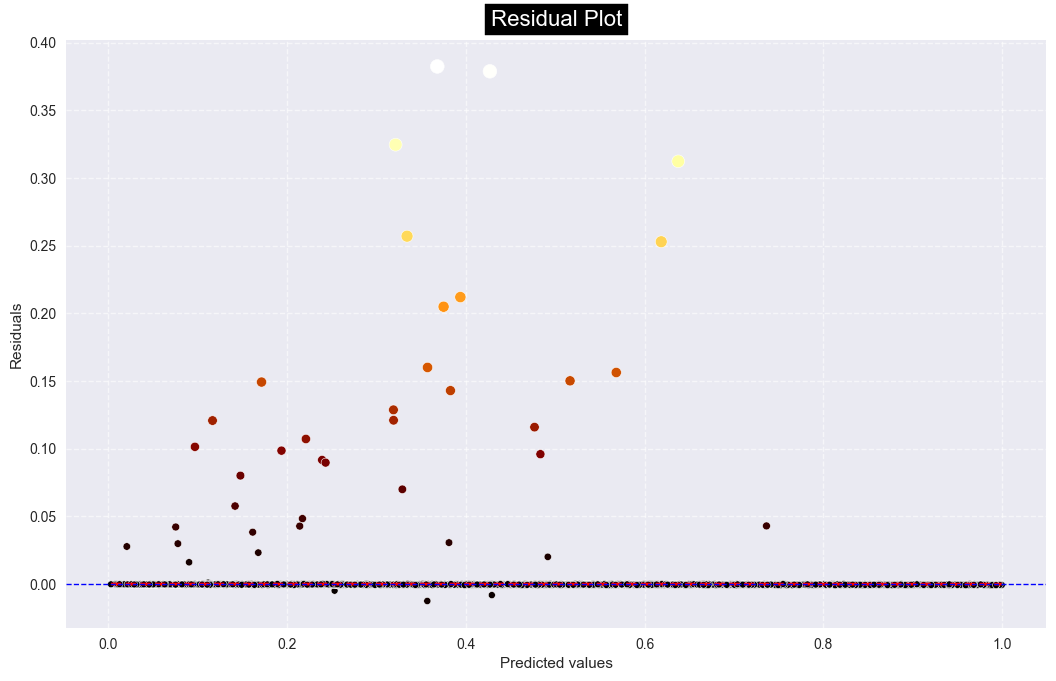

In [147]:
custom_residual_plot(y_true=testY, y_pred=y_pred, figsize=(10, 6), color='afmhot')

> Insight: Most of the data points fit the y=0 line, although there are still some residuals larger than 0.3 (which could be outliers or some difficult-to-learn patterns), but with such a small number and not spread over the entire value range, it is still acceptable in practice. Therefore, we have a basis to trust the R2 score obtained above.

<br>

<h2 align='center'>
<span style='background:black; color:orange'>
<b>
6 | Using evaluation metrics
</b>
</span>
</h2>

In [148]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from typing import Dict, Any

Set up function to choose the best parameters for our model:

In [ ]:
def best_params(
    model: ClassifierMixin,
    param_grid: Dict[str, list],
    trainX: np.array = trainX,
    trainY: np.array = trainY,
    scoring: str = 'neg_mean_absolute_error',
    cv: int = 5
) -> Dict[str, Any]:
    '''
        Perform GridSearchCV for given model and parameter grid.
        Returns the best parameter(s).
    '''
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=cv,
        scoring=scoring
    )
    grid_search.fit(trainX, trainY)
    best_params = grid_search.best_params_
    print(f'Best parameters found: {best_params}')
    return best_params

<br>
<h3 align='center'>
<span style='background:lightyellow; color:orange'>
<b>
6.1 | Ridge model
</b>
</span>
</h3>

In [150]:
ridge_alpha = best_params(
    model=Ridge(), 
    param_grid={'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1.0]}
)

Best parameters found: {'alpha': 0.1}


Build Ridge model and show model's intercept and coeficient:

In [151]:
def build_ridge_model(X: np.array, y: np.array, alpha: float) -> ClassifierMixin:
    model = Ridge(alpha=alpha)
    model.fit(X, y)
    return model

ridge_model = build_ridge_model(trainX, trainY, ridge_alpha['alpha'])
ridge_pred, ridge_r2 = model_display(model=ridge_model)

R2 score: 0.9983390232585755
Model Coefficent:
-0.001904017381538593
Model Intercept: 0.10849901655012387


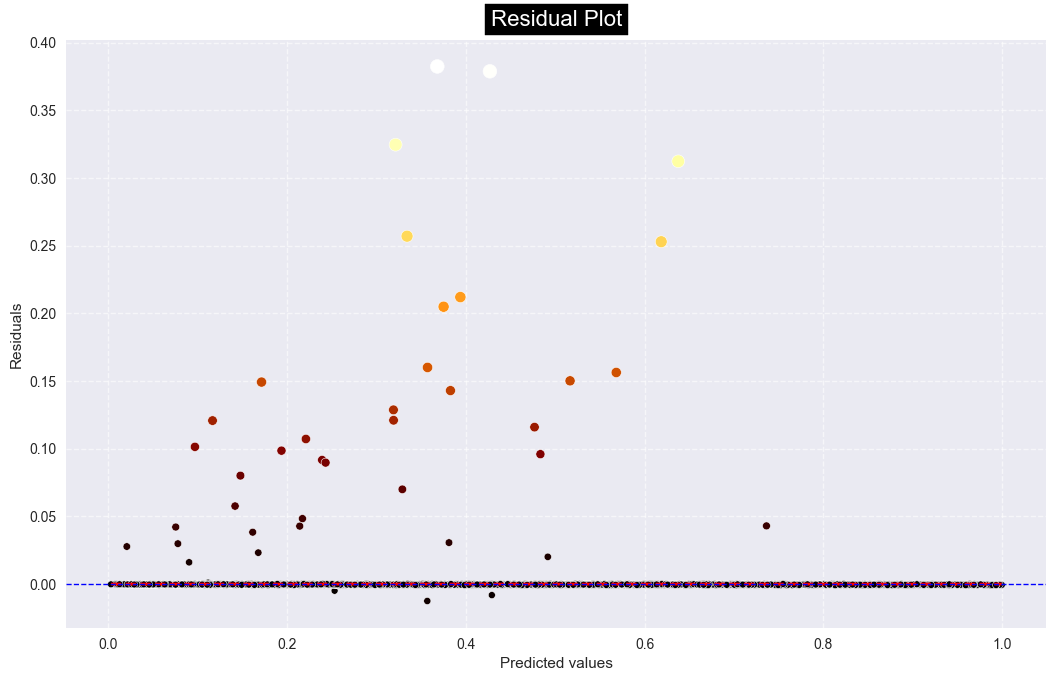

In [152]:
custom_residual_plot(
    y_true=testY, y_pred=ridge_pred, figsize=(10, 6), color='afmhot'
)

<br>
<h3 align='center'>
<span style='background:lightyellow; color:orange'>
<b>
6.2 | Lasso algorithm
</b>
</span>
</h3>

In [153]:
lasso_alpha = best_params(
    model=Lasso(), 
    param_grid={'alpha': [1e-8, 1e-6, 1e-4, 1e-3, 1e-2, 0.1, 1.0]}
)

Best parameters found: {'alpha': 1e-08}


Build Lasso model and show model's intercept and coeficient:

In [154]:
def build_lasso_model(X: np.array, y: np.array, alpha: float) -> ClassifierMixin:
    model = Lasso(alpha=alpha)
    model.fit(X, y)
    return model

lasso_model = build_ridge_model(trainX, trainY, ridge_alpha['alpha'])
lasso_pred, lasso_r2 = model_display(model=lasso_model)

R2 score: 0.9983390232585755
Model Coefficent:
-0.001904017381538593
Model Intercept: 0.10849901655012387


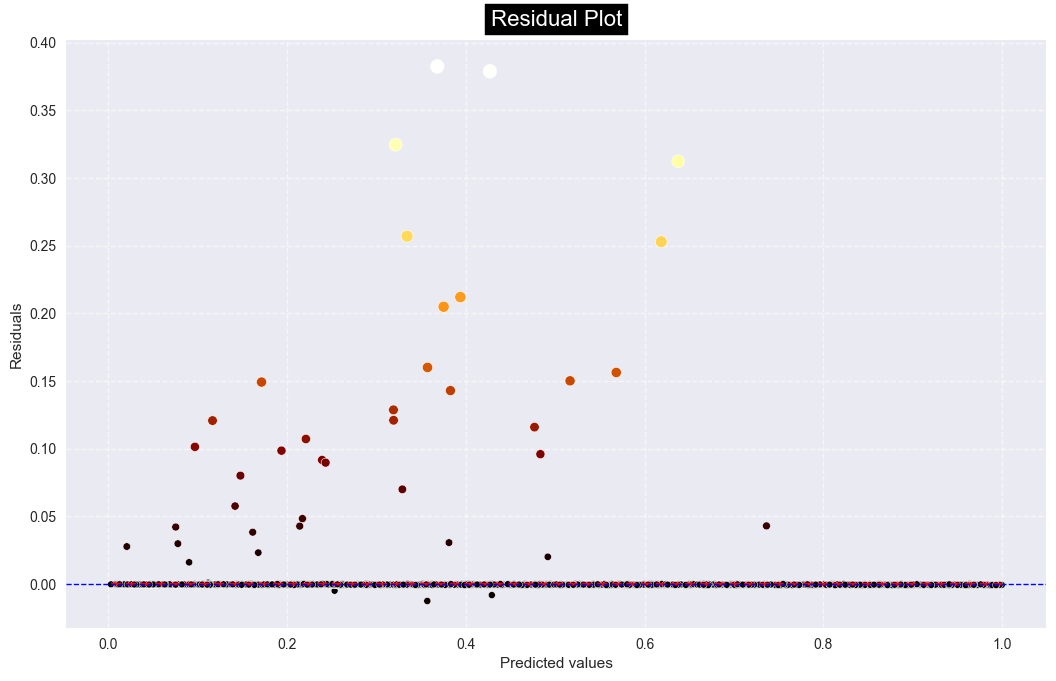

In [155]:
custom_residual_plot(
    y_true=testY, y_pred=lasso_pred, figsize=(10, 6), color='afmhot'
)

<br>
<h3 align='center'>
<span style='background:lightyellow; color:orange'>
<b>
6.3 | ElasticNet algorithm
</b>
</span>
</h3>

In [156]:
enet_params = best_params(
    model=ElasticNet(), 
    param_grid={
        'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1.0],
        'l1_ratio': [1e-8, 1e-6, 1e-4, 1e-3, 1e-2, 0.1]
    }
)

Best parameters found: {'alpha': 1e-05, 'l1_ratio': 1e-08}


Build ElasticNet model and show model's intercept, coeficient:

In [157]:
def build_elasticNet_model(
    X: np.array, y: np.array, alpha: float, l1_ratio: float
) -> ClassifierMixin:
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    model.fit(X, y)
    return model

enet_model = build_elasticNet_model(
    trainX, trainY, enet_params['alpha'], enet_params['l1_ratio'])

enet_pred, enet_r2 = model_display(enet_model)

R2 score: 0.9983389703992697
Model Coefficent:
-0.0019035487286941455
Model Intercept: 0.10852089927115205


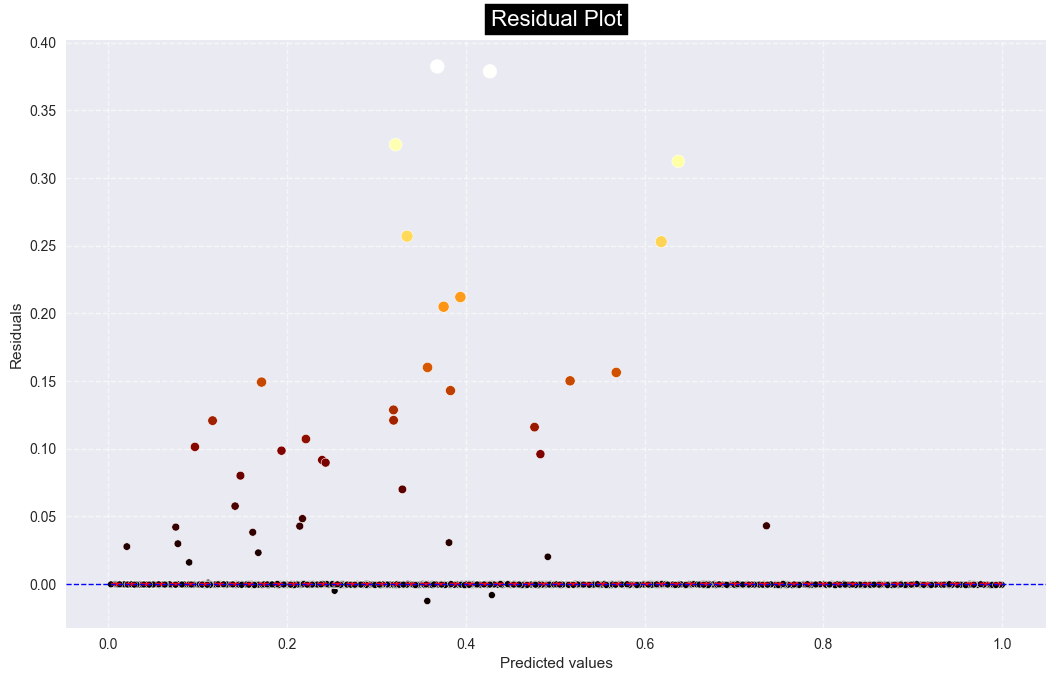

In [158]:
custom_residual_plot(
    y_true=testY, y_pred=enet_pred, figsize=(10, 6), color='afmhot'
)

Comparing both 4 models R2 score:

In [159]:
r2_comparation = {
    'Linear Regression': lr_r2,
    'Ridge': ridge_r2,
    'Lasso': lasso_r2,
    'ElasticNet': enet_r2,
}
sorted_r2 = sorted(r2_comparation.items(), key=lambda x: x[1], reverse=True)
sorted_r2

[('Linear Regression', 0.99833902887883),
 ('Ridge', 0.9983390232585755),
 ('Lasso', 0.9983390232585755),
 ('ElasticNet', 0.9983389703992697)]

<br>
<h2 align='center'>
<span style='background:black; color:orange'>
<b>
7 | Polynomial Transform
</b>
</span>
</h2>

In [160]:
# Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures

When the data feature does not conform to a linear function, a linear regression cannot be applied directly to the original data. Scikit-Learn supports converting data features to polynomials through `PolynomialFeatures`.

$$y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots$$

The formula above uses the transformation $x$ from 1-D to the other, with the aim of being able to use linear regression to find complex relationships between $x$ and $y$.

In [161]:
def build_pipeline(
    X: np.array, y: np.array, dim: int
) -> ClassifierMixin:
    poly_model = make_pipeline(
        PolynomialFeatures(dim, include_bias=False), 
        LinearRegression()
    )
    poly_model.fit(X, y)
    return poly_model

We use `make_pipeline` to apply PolynomialFeatures and a Regression model train your dataset and compare the predict value:

In [162]:
poly_model = build_pipeline(X=trainX, y=trainY, dim=2)

poly_pred = poly_model.predict(trainX)
print(f'R2 score of linear model (with poly transform) on Training set: {r2_score(y_pred=poly_pred, y_true=trainY)}\n' )

poly_pred = poly_model.predict(testX)
print(f'R2 score of linear model (with poly transform) on Testing set: {r2_score(y_pred=poly_pred, y_true=testY)}')

R2 score of linear model (with poly transform) on Training set: 0.9982566131232541

R2 score of linear model (with poly transform) on Testing set: 0.9983428750219067


<div class='alert alert-warning' role='alert'>
<strong>What will the result be if we choose the n order too high?</strong>

Choosing a polynomial order that is too high can lead to overfitting, increased variance, and computational complexity. It's crucial to use techniques like cross-validation to select an appropriate polynomial degree that balances bias and variance, ensuring good generalization to new, unseen data.
</div>